# Lasso, Ridge, Elastic Regression

# EDA with Algerian forest fire dataset.

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [2]:
dataset= pd.read_csv("Algerian_forest_fires_dataset.csv")

In [3]:
dataset.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.1+ KB


# Data Cleaning

In [5]:
# Checking for null value. 
dataset[dataset.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
168,14,7,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


# The dataset is converted into two sets based on Region from 122th index, we can make a new column based on region. 
1. "Bajaia Region Dataset"
2. "Sidi-Bel Abbes Region Dataset"
Add new column with region

In [6]:
dataset.loc[:122,"Region"] =0
dataset.loc[122:, "Region"] =1
df = dataset

In [7]:
df.tail()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
242,26,9,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,1.0
243,27,9,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,1.0
244,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1.0
245,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1.0
246,30,9,2012,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,not fire,1.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          246 non-null    object 
 1   month        245 non-null    object 
 2   year         245 non-null    object 
 3   Temperature  245 non-null    object 
 4    RH          245 non-null    object 
 5    Ws          245 non-null    object 
 6   Rain         245 non-null    object 
 7   FFMC         245 non-null    object 
 8   DMC          245 non-null    object 
 9   DC           245 non-null    object 
 10  ISI          245 non-null    object 
 11  BUI          245 non-null    object 
 12  FWI          245 non-null    object 
 13  Classes      244 non-null    object 
 14  Region       247 non-null    float64
dtypes: float64(1), object(14)
memory usage: 29.1+ KB


In [9]:
# changing the datatype of Region 
df['Region'] = df['Region'].astype(int)

In [10]:
df.isnull().sum()

day            1
month          2
year           2
Temperature    2
 RH            2
 Ws            2
Rain           2
FFMC           2
DMC            2
DC             2
ISI            2
BUI            2
FWI            2
Classes        3
Region         0
dtype: int64

In [11]:
# Removing the null values
df=df.dropna().reset_index(drop=True)

In [12]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          244 non-null    object
 1   month        244 non-null    object
 2   year         244 non-null    object
 3   Temperature  244 non-null    object
 4    RH          244 non-null    object
 5    Ws          244 non-null    object
 6   Rain         244 non-null    object
 7   FFMC         244 non-null    object
 8   DMC          244 non-null    object
 9   DC           244 non-null    object
 10  ISI          244 non-null    object
 11  BUI          244 non-null    object
 12  FWI          244 non-null    object
 13  Classes      244 non-null    object
 14  Region       244 non-null    int64 
dtypes: int64(1), object(14)
memory usage: 28.7+ KB


In [14]:
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,1


In [15]:
df = df.drop(122).reset_index(drop=True) #The parameter drop=True ensures that the old index is not added as a new column in the DataFrame.

In [16]:
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,1


In [17]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [18]:
## Fixing the space in the column. 
df.columns = df.columns.str.strip()
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          243 non-null    object
 1   month        243 non-null    object
 2   year         243 non-null    object
 3   Temperature  243 non-null    object
 4   RH           243 non-null    object
 5   Ws           243 non-null    object
 6   Rain         243 non-null    object
 7   FFMC         243 non-null    object
 8   DMC          243 non-null    object
 9   DC           243 non-null    object
 10  ISI          243 non-null    object
 11  BUI          243 non-null    object
 12  FWI          243 non-null    object
 13  Classes      243 non-null    object
 14  Region       243 non-null    int64 
dtypes: int64(1), object(14)
memory usage: 28.6+ KB


## Changing the required column in the int dtype 


In [20]:
df[['day','month','year','RH','Temperature','Ws']] = df[['day','month','year','RH','Temperature','Ws']].astype(int)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          243 non-null    int64 
 1   month        243 non-null    int64 
 2   year         243 non-null    int64 
 3   Temperature  243 non-null    int64 
 4   RH           243 non-null    int64 
 5   Ws           243 non-null    int64 
 6   Rain         243 non-null    object
 7   FFMC         243 non-null    object
 8   DMC          243 non-null    object
 9   DC           243 non-null    object
 10  ISI          243 non-null    object
 11  BUI          243 non-null    object
 12  FWI          243 non-null    object
 13  Classes      243 non-null    object
 14  Region       243 non-null    int64 
dtypes: int64(7), object(8)
memory usage: 28.6+ KB


In [22]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0


# Changing the other datatypes to float data type

In [23]:
objects = [features for features in df.columns if df[features].dtypes=='O']

In [24]:
objects

['Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes']

In [25]:
for i in objects: 
    if i != "Classes":
        df[i] = df[i].astype(float)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB


In [49]:
# Let save the cleaned dataset
df.to_csv('Algerian_forest_fires_cleaned_dataset.csv',index=False)

# Exploratory Data Analysis

In [50]:
# drop day, month,year 
df_copy = df.drop(['day','month','year'],axis=1)

In [51]:
df_copy.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [52]:
# categories in classes 
df_copy['Classes'].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [53]:
# Encoding of the categories in classes 
df_copy['Classes'] = np.where(df_copy['Classes'].str.contains("not fire"),0,1)

In [54]:
df_copy.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [55]:
df_copy.tail()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1
242,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,0,1


In [56]:
df_copy['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [57]:
## Plot density plot for all features 
plt.style.use('seaborn')
df_copy.hist(bins=50,figsize=(20,15))
plt.show()

OSError: 'seaborn' is not a valid package style, path of style file, URL of style file, or library style name (library styles are listed in `style.available`)

In [58]:
## Percentage of Pie Chart 
percentage = df_copy['Classes'].value_counts(normalize=True)*100

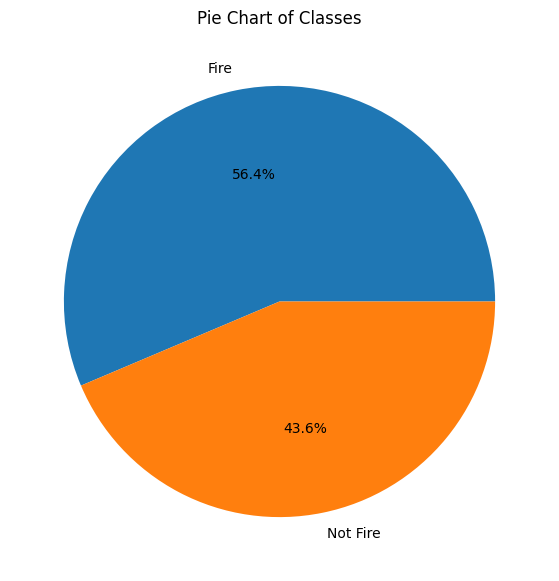

In [59]:
#Ploting Pie Chart
classlabels=['Fire','Not Fire']
plt.figure(figsize=(12,7))
plt.pie(percentage,labels=classlabels,autopct='%1.1f%%')
plt.title("Pie Chart of Classes")
plt.show()

In [60]:
df_copy.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
Temperature,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.516015,0.269555
RH,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.432161,-0.402682
Ws,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.069964,-0.181160
Rain,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.379097,-0.040013
FFMC,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.769492,0.222241
DMC,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.585658,0.192089
DC,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.511123,-0.078734
ISI,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895,0.735197,0.263197
BUI,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.857973,0.586639,0.089408
FWI,0.566670,-0.580957,0.032368,-0.324422,0.691132,0.875864,0.739521,0.922895,0.857973,1.000000,0.719216,0.197102


<Axes: >

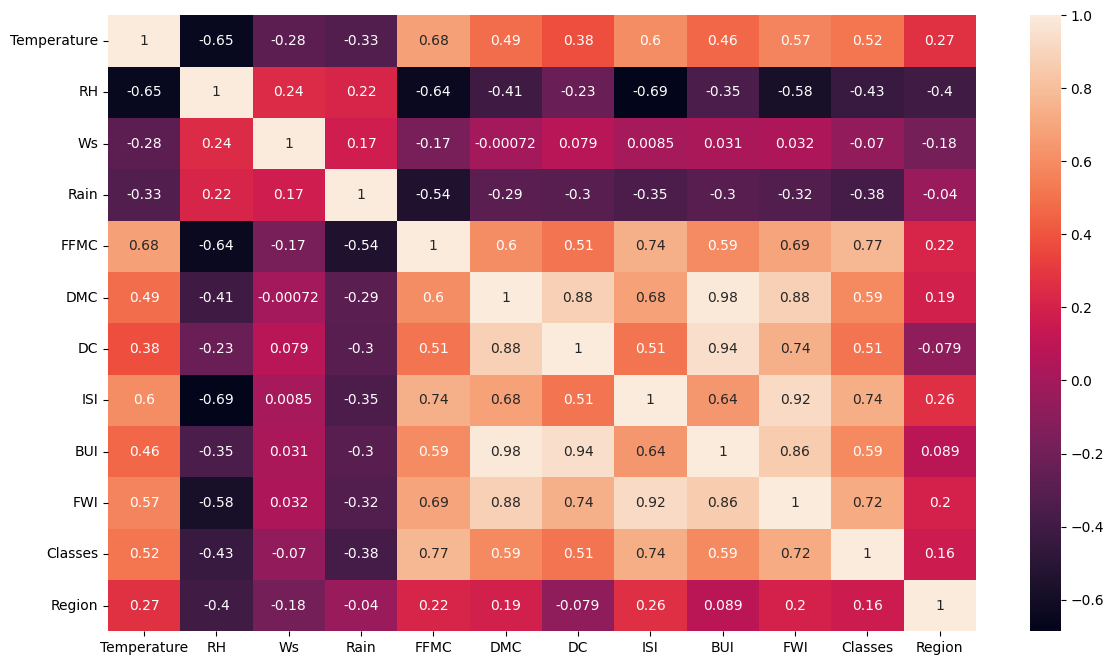

In [38]:
plt.figure(figsize=(14,8))
sns.heatmap(df_copy.corr(),annot = True)

<Axes: ylabel='FWI'>

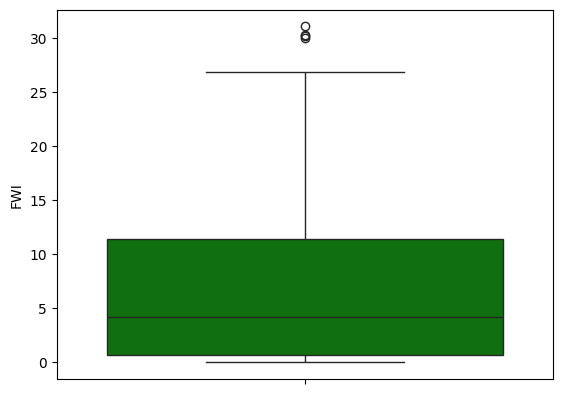

In [61]:
sns.boxplot(df['FWI'],color="green")

In [62]:
df_copy.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


Text(0.5, 1.0, 'Fire Analysis of Sidi-Bel Regions')

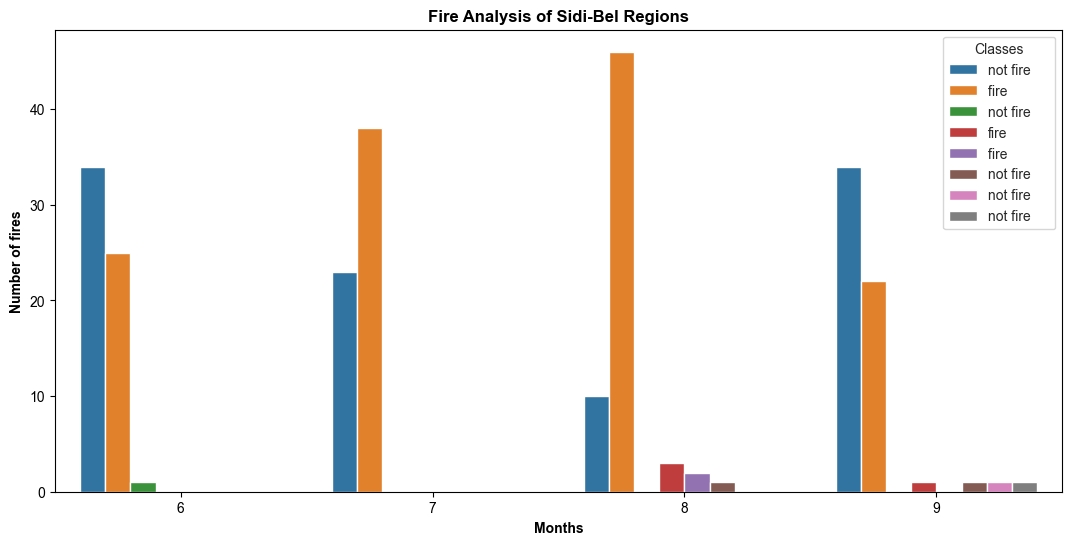

In [63]:
## Monthly Fire Analysis
df_copytemp = df_copy.loc[df_copy['Region']==1]
plt.subplots(figsize=(13,6))
sns.set_style('whitegrid')
sns.countplot(x='month',hue='Classes',data=df)
plt.ylabel("Number of fires",weight = 'bold')
plt.xlabel("Months",weight='bold')
plt.title("Fire Analysis of Sidi-Bel Regions",weight='bold')

Text(0.5, 1.0, 'Fire Analysis of bajaria Regions')

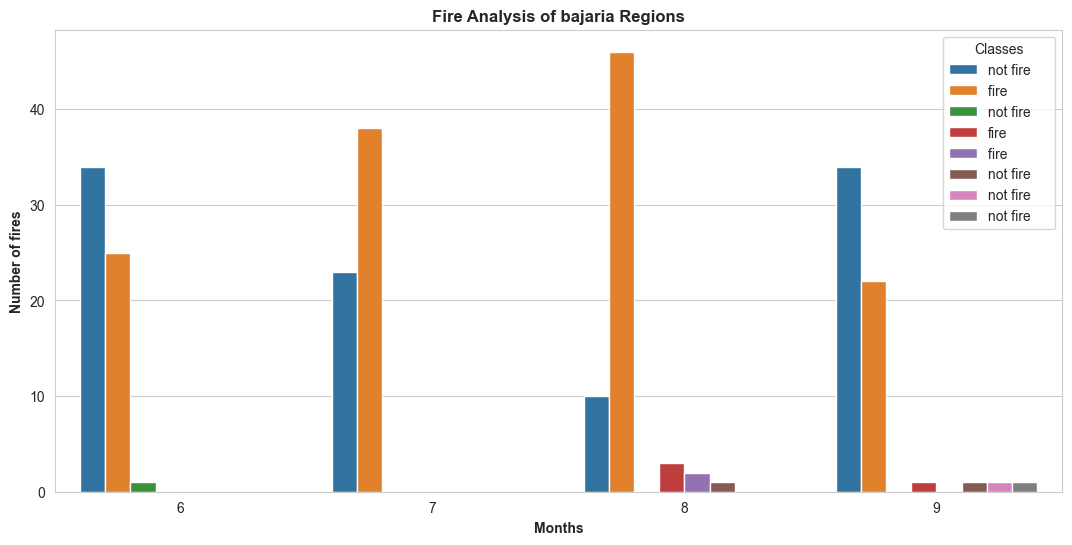

In [64]:
## Monthly Fire Analysis
df_copytemp = df_copy.loc[df_copy['Region']==0]
plt.subplots(figsize=(13,6))
sns.set_style('whitegrid')
sns.countplot(x='month',hue='Classes',data=df)
plt.ylabel("Number of fires",weight = 'bold')
plt.xlabel("Months",weight='bold')
plt.title("Fire Analysis of bajaria Regions",weight='bold')

# Observation --
 More fire occurs generally july and august month for both of the forest.

In [65]:
df =pd.read_csv("Cleaned_dataset.csv")

In [66]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [67]:
df.columns

Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'FWI', 'Classes', 'Region'],
      dtype='object')

In [68]:
df['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [69]:
df_copy.to_csv("Cleaned_dataset.csv",index=False)

In [70]:
# Independent and dependent feature
X = df.drop("FWI",axis=1)
y= df['FWI']

In [71]:
X.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0


In [72]:
y

0      0.5
1      0.4
2      0.1
3      0.0
4      0.5
      ... 
238    6.5
239    0.0
240    0.2
241    0.7
242    0.5
Name: FWI, Length: 243, dtype: float64

In [73]:
# Train Test split 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [74]:
X_train.shape, X_test.shape

((182, 11), (61, 11))

In [75]:
## Feature selection based on correlation. 
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.542141,0.254549
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.456876,-0.394665
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.082570,-0.199969
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.369357,-0.059022
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.781259,0.249514
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.617273,0.212582
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.543581,-0.060838
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.742977,0.296441
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.612239,0.114897
Classes,0.542141,-0.456876,-0.082570,-0.369357,0.781259,0.617273,0.543581,0.742977,0.612239,1.000000,0.188837


# Feature Selection based on correlation


<Axes: >

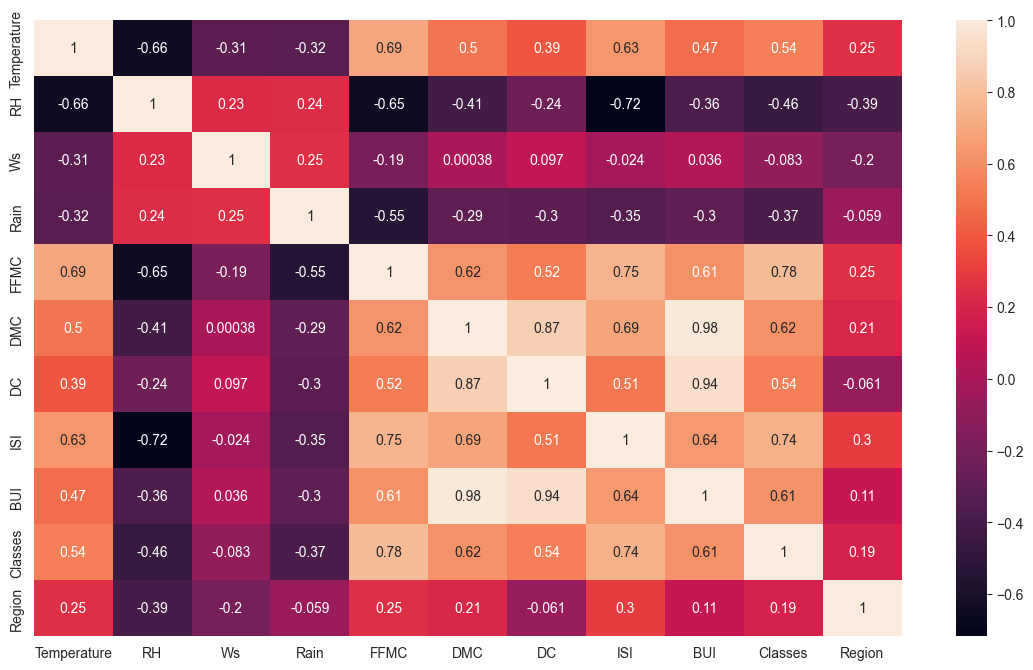

In [76]:
# Check for multicollinearity
plt.figure(figsize=(14,8))
corr = X_train.corr()
sns.heatmap(corr,annot = True)

In [77]:
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.542141,0.254549
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.456876,-0.394665
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.082570,-0.199969
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.369357,-0.059022
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.781259,0.249514
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.617273,0.212582
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.543581,-0.060838
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.742977,0.296441
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.612239,0.114897
Classes,0.542141,-0.456876,-0.082570,-0.369357,0.781259,0.617273,0.543581,0.742977,0.612239,1.000000,0.188837


In [80]:
def correlation(dataset,thresold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):  
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > thresold: 
                colname = corr_matrix.columns[i] 
                col_corr.add(colname) 
    return col_corr

In [81]:
## thresold -- Domain expertise 
corr_features = correlation(X_train, 0.85)

In [82]:
corr_features

{'BUI', 'DC'}

In [83]:
## Drop feature when correlation is more than 0.85 
X_train.drop(corr_features,axis=1,inplace=True)
X_test.drop(corr_features,axis=1,inplace=True)
X_train.shape, X_test.shape

((182, 9), (61, 9))

# Feature Scaling Or Standardization

In [85]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [87]:
X_train_scaled

(182, 9)

# Box plot to understand the effect of Standard scaler

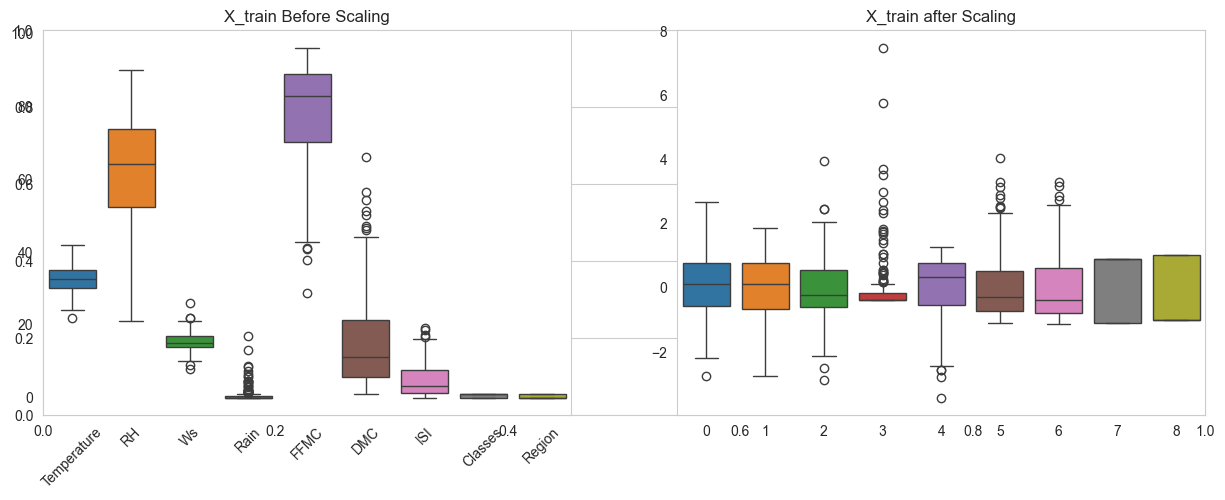

In [97]:
plt.subplots(figsize=(15,5))
plt.subplot(1,2,1) 
sns.boxplot(data=X_train)
plt.title("X_train Before Scaling")
plt.xticks(rotation=45)
plt.grid(False)

plt.subplot(1,2,2)
sns.boxplot(data=X_train_scaled)
plt.title("X_train after Scaling")
plt.grid(False)


# Linear Regression Model


In [111]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
linearReg = LinearRegression()
linearReg.fit(X_train_scaled,y_train)
y_pred = linearReg.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred) 
print("Mean absolute error",mae)
print("R2 square",r2)

Mean absolute error 0.546823646524997
R2 square 0.9847657384266951


# Lasso Regression

In [116]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
lasso = Lasso()
lasso.fit(X_train_scaled,y_train)
y_pred = lasso.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
print("Mean absolute error",mae)
print("R2 score",r2)

Mean absolute error 1.133175994914409
R2 score 0.9492020263112388


# Ridge Regression Model

In [118]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
ridge = Ridge()
ridge.fit(X_train_scaled,y_train)
y_pred = ridge.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("Mean absolute eroor",mae)
print("R2 Score",score)

Mean absolute eroor 0.5642305340105691
R2 Score 0.9842993364555513


# Elastic Regression

In [121]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
elastic = ElasticNet()
elastic.fit(X_train_scaled,y_train)
y_pred = elastic.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("Mean absolute eroor",mae)
print("R2 Score",score)

Mean absolute eroor 1.8822353634896
R2 Score 0.8753460589519703


In [122]:
import pickle
pickle.dump(scaler,open('scaler.pkl','wb'))
pickle.dump(ridge,open('ridge.pkl','wb'))